In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LinearLocator

pd.set_option('display.max_rows', 100)
pd.set_option("display.max.columns", None)
df = pd.read_pickle('12_tasks.pkl').dropna()

In [3]:
plt.style.use('bmh')

In [4]:
ooo_RT = ('odd_one_out','avg_ms_correct')
gr_RT = ('grammatical_reasoning','avg_ms_correct')
ds_RT = ('digit_span','avg_ms_per_item')

data = df[[ooo_RT,gr_RT,ds_RT]].astype(float).sample(200, random_state=42).round(2)
x,y1,y2 = data[ooo_RT],data[gr_RT],data[ds_RT]

In [13]:
def change_style(ax,xlim=None, ylim=None, xlabel='X label', ylabel='Y label'):

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

    if type(None) != type(ylim):
        ax.set_ylim(*ylim)
    if type(None) != type(xlim):
        ax.set_xlim(*xlim)
    
    ax.xaxis.set_major_locator(LinearLocator(5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.spines[['bottom', 'left']].set_visible(True)
    ax.spines[['bottom', 'left']].set_color('k')
    
    ax.tick_params(which='major', width=1.0)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', width=1.0, labelsize=10)
    ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

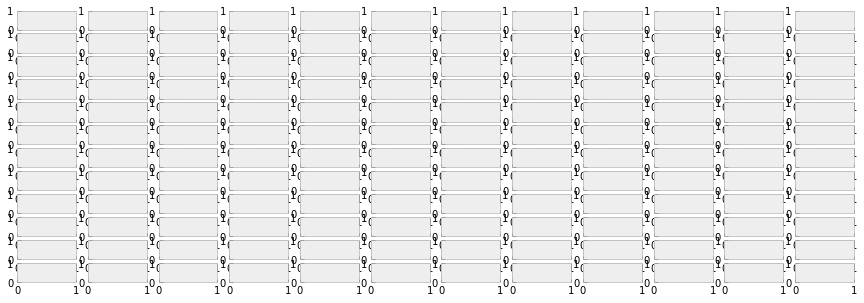

In [17]:
# fig, ax = plt.subplots(12,12,figsize=(15, 5))


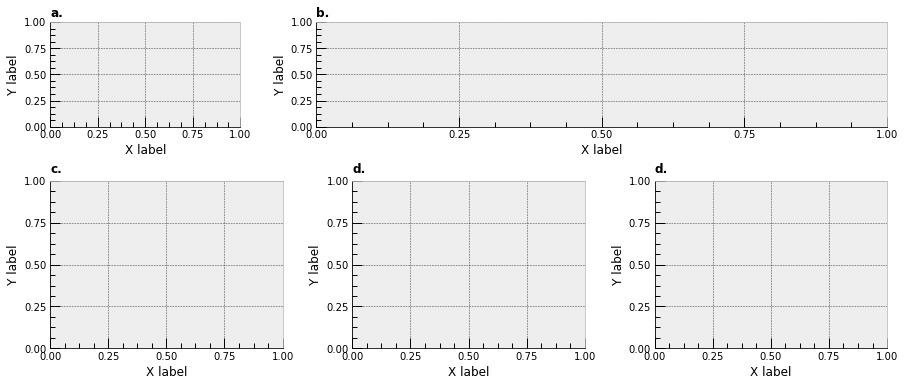

In [23]:
fig = plt.figure(figsize=(15, 6), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, height_ratios=[1.25, 2])
gs1 = gs[0].subgridspec(1, 2, width_ratios=[1, 3],wspace=0.2)
gs2 = gs[1].subgridspec(ncols=3, nrows=1,wspace=0.3)
plt.rcParams.update({'font.size': 10})

a1 = fig.add_subplot(gs1[0])
add_panel_letter(a1,'a.')
a2 = fig.add_subplot(gs1[1])
add_panel_letter(a2,'b.')
a3 = fig.add_subplot(gs2[0])
add_panel_letter(a3,'c.')
a4 = fig.add_subplot(gs2[1])
add_panel_letter(a4,'d.')
a5 = fig.add_subplot(gs2[2])
add_panel_letter(a5,'d.')
for a in [a1,a2,a3,a4,a5]:
    change_style(a)
fig.subplots_adjust(hspace=0.4)

In [24]:
def add_panel_letter(ax, letter ,pos=( 0, 1.05), fontsize=12):
    ax.text(*pos, 
            letter, 
            ha='left',
            fontsize=fontsize,
            fontweight='bold', 
            transform=ax.transAxes)

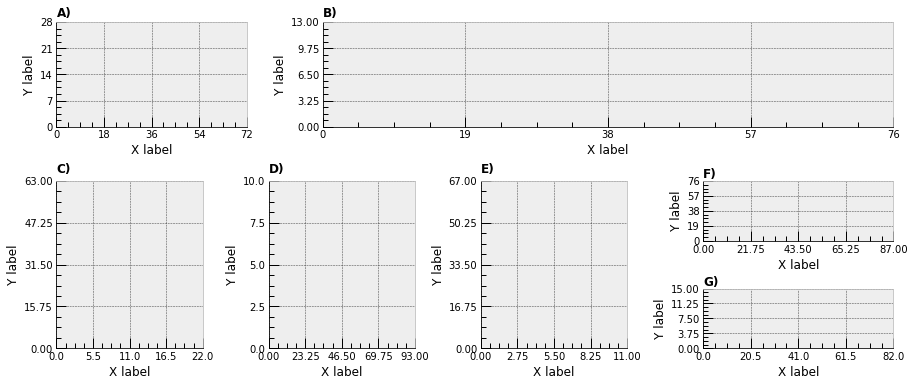

In [26]:
rng = np.random.default_rng(2022)
fig = plt.figure(figsize=(15, 6), constrained_layout=True)
gs = fig.add_gridspec(nrows=2,ncols=2, height_ratios=[1.25, 2],width_ratios=[3, 1])
gs1 = gs[0,:].subgridspec(1, 2, width_ratios=[1, 3],wspace=0.2)
gs2 = gs[1,0].subgridspec(ncols=3, nrows=1,wspace=0.45)
gs3 = gs[1,1].subgridspec(nrows=2,ncols=1 ,hspace=0.8)
plt.rcParams.update({'font.size': 10})

a1 = fig.add_subplot(gs1[0])
a2 = fig.add_subplot(gs1[1])
a3 = fig.add_subplot(gs2[0])
a4 = fig.add_subplot(gs2[1])
a5 = fig.add_subplot(gs2[2])
a6 = fig.add_subplot(gs3[0])
a7 = fig.add_subplot(gs3[1])
for i,a in enumerate([a1,a2,a3,a4,a5,a6,a7]):
    xlim = rng.integers(5,100,size=1)*[0,1]
    ylim = rng.integers(5,100,size=1)*[0,1]
    change_style(a,xlim=xlim,ylim=ylim)
    add_panel_letter(a,f'{chr(65+i)})')
fig.subplots_adjust(hspace=0.4)

In [28]:
factor = 'caffeine_per_day'
df_ = df.xs('info',1)

In [50]:
coffe_per_day = pd.cut(df_[factor],[0,0.1,2,4,100], include_lowest=True, labels=['No Coffee','Some','Extreem','insane'])

In [51]:
coffe_per_ss =  pd.concat([coffe_per_day.value_counts().rename('obs'),
                           coffe_per_day.value_counts(normalize=True).rename('prop')],
                          axis =1)
coffe_per_ss

,obs,prop
Some,2692,0.509848
Extreem,1190,0.225379
No Coffee,999,0.189205
insane,399,0.075568


Text(0.5, 0.98, 'Evolution of a pie chart')

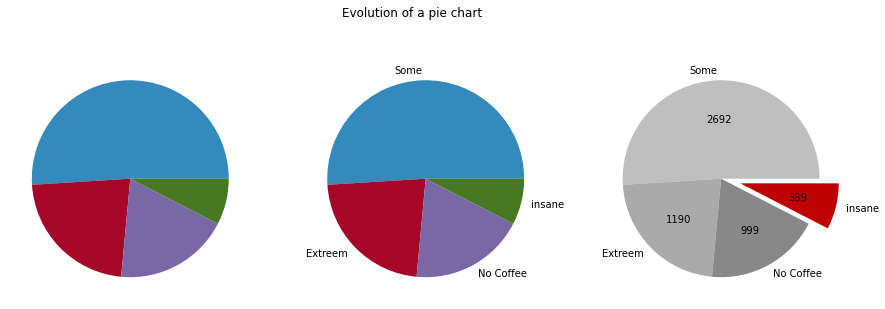

In [59]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

total = coffe_per_ss.obs.sum()

ax[0].pie(coffe_per_ss.obs)

ax[1].pie(coffe_per_ss.obs,labels=coffe_per_ss.index);

ax[2].pie(coffe_per_ss.obs,
          colors = ['#BFBFBF','#AAAAAA','#888888','#BF0000'],
          labels=coffe_per_ss.index,
          autopct = lambda x: f'{x*total /100:1.0f}',
          explode = (0,0,0,0.2));
fig.suptitle('Evolution of a pie chart')

<AxesSubplot:xlabel='caffeine_per_day'>

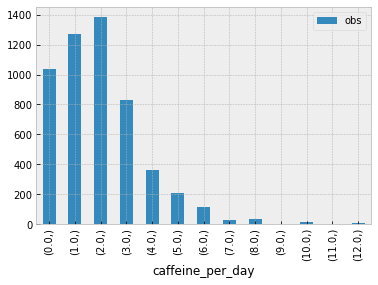

In [92]:
vc.plot.bar()

In [93]:
vc

,obs
caffeine_per_day,
0.0,1039
1.0,1270
2.0,1385
3.0,828
4.0,359
5.0,205
6.0,111
7.0,27
8.0,31


<BarContainer object of 13 artists>

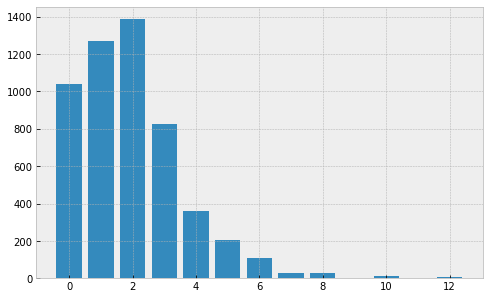

In [114]:
vc = (df_.query('caffeine_per_day < 15 ')[factor]
         .round()
         .value_counts()
         .rename('obs')
         .sort_index()
         .to_frame() 
     )


fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(vc.index,vc.obs)

In [113]:
vc.index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
              12.0],
             dtype='float64')